In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

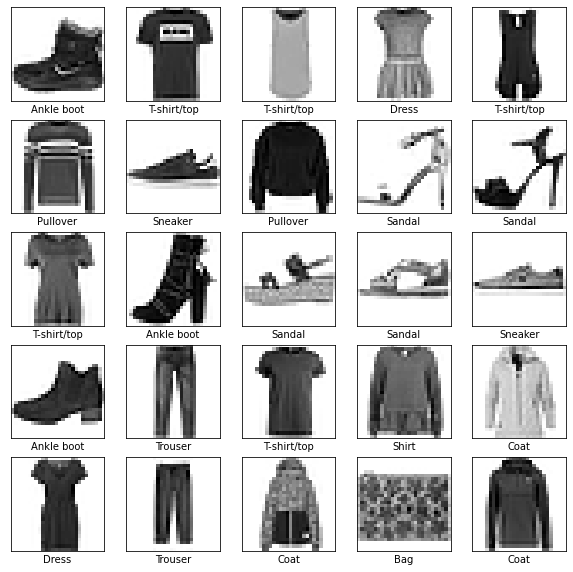

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(128,activation='relu'),
                        keras.layers.Dense(10, activation='softmax')])

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4945 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3754 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3367 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3132 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2951 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2791 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2698 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2569 - accuracy: 0.9052
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2484 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 1ms/step - loss: 0.3441 - accuracy: 0.8799
Test accuracy: 0.8798999786376953


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 [==============================] - 0s 1ms/step - loss: 0.3441 - accuracy: 0.8799
Test accuracy: 0.8798999786376953


In [17]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 1ms/step


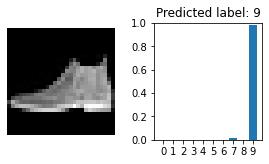

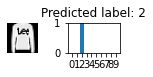

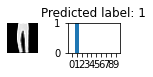

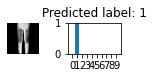

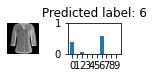

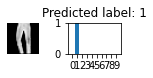

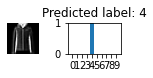

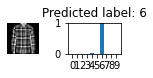

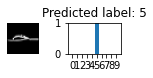

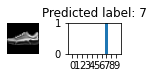

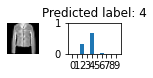

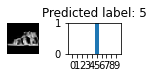

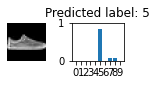

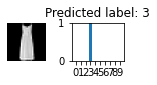

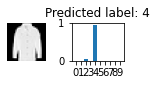

In [33]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 *2 * num_cols, 2 * num_rows)) 
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plt.imshow(test_images[i], cmap='gray') 
    plt.axis('off')
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plt.bar(range(10), predictions[i]) 
    plt.xticks(range(10))
    plt.ylim([0, 1])
    plt.tight_layout()
    plt.title(f"Predicted label: {predicted_labels[i]}")
    plt.show()